In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from pathlib import Path
import iraklis7_linrg.config as config
import iraklis7_linrg.plots as plots

### Load the data

In [29]:
norm_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC
features_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_FEATURES
labels_path: Path = config.PROCESSED_DATA_DIR / config.DATASET_PROC_LABELS
plot_path: Path = config.FIGURES_DIR / config.FEATURES_PLOT
heatmap_path: Path = config.FIGURES_DIR / config.HEATMAP_PLOT

data_tr = config.read_data(norm_path)
if data_tr is None:
    raise ValueError("read_data failed - data is None")
features = config.read_data(features_path)
if features is None:
    raise ValueError("read_data failed - data is None")
labels = config.read_data(labels_path)
if labels is None:
    raise ValueError("read_data failed - data is None")

features.sample(10)

,Κωδικός Συστήματος,Εμβαδόν,Όροφος,Σύνολο ορόφων,Ασανσέρ,Θέα,Έτος κατασκευής,Έτος ανακαίνισης,Όροφος Ρετιρέ,Ηλικία,Κατάσταση,Ασανσέρ από 3ο
81,0.372246,0.236899,-1.321908,0.484042,0.325222,0.607493,-0.362651,0.669126,-0.325222,-0.636219,1.247554,-1.343457
47,-0.532791,-0.248723,1.528456,NaN,0.325222,0.607493,-0.778524,0.669126,-0.325222,-0.636219,1.247554,0.744348
89,0.590013,-0.005912,-0.846847,NaN,0.325222,-1.646110,0.422886,NaN,-0.325222,0.718692,-0.831703,-1.343457
2,0.208021,0.576834,1.528456,1.047290,0.325222,0.607493,-0.316443,-1.581569,3.074824,-0.636219,-0.831703,0.744348
96,-0.078087,-0.491533,0.103274,-0.642455,0.325222,0.607493,-0.131611,0.579098,3.074824,-0.636219,1.247554,0.744348
101,0.191845,-0.977155,1.528456,NaN,0.325222,0.607493,-0.963356,NaN,-0.325222,-0.636219,-0.831703,0.744348
57,0.256087,0.479710,-0.371787,0.484042,0.325222,-1.646110,-0.501275,0.399042,-0.325222,-0.636219,1.247554,0.744348
48,0.584179,1.790888,-0.371787,-0.079207,0.325222,-1.646110,-0.131611,NaN,-0.325222,-0.636219,-0.831703,0.744348
106,0.451774,-0.977155,-0.846847,0.484042,0.325222,0.607493,-0.362651,-2.481847,-0.325222,-0.636219,-0.831703,-1.343457
104,-0.358357,-0.151598,-0.846847,NaN,0.325222,0.607493,1.901545,NaN,-0.325222,2.073604,1.247554,-1.343457


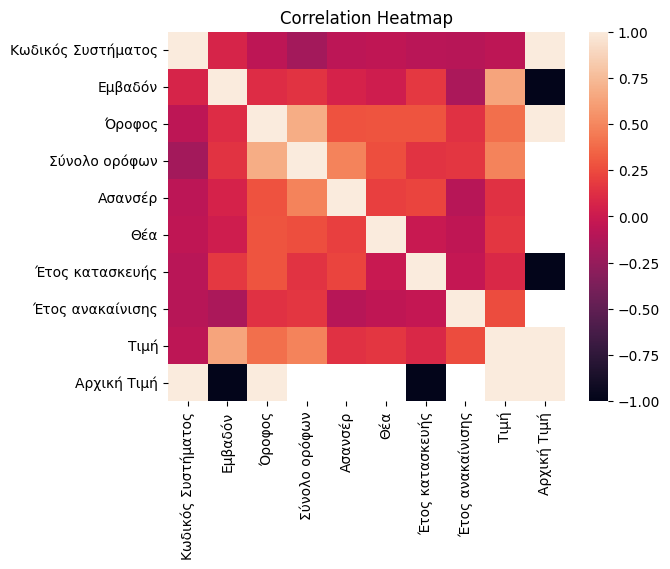

<Figure size 640x480 with 0 Axes>

In [30]:
plots.do_heatmap(data_tr, show=True, output_path=heatmap_path)


### Visualize features and labels

In [20]:
features.head()

,Κωδικός Συστήματος,Εμβαδόν,Όροφος,Σύνολο ορόφων,Ασανσέρ,Θέα,Έτος κατασκευής,Έτος ανακαίνισης,Όροφος Ρετιρέ,Ηλικία,Κατάσταση,Ασανσέρ από 3ο
0,-0.199786,0.479710,-1.321908,-0.642455,0.325222,0.607493,0.238054,0.399042,-0.325222,0.718692,1.247554,-1.343457
1,-0.451020,-0.782906,-0.846847,NaN,0.325222,0.607493,-0.224027,NaN,-0.325222,-0.636219,-0.831703,-1.343457
2,0.208021,0.576834,1.528456,1.047290,0.325222,0.607493,-0.316443,-1.581569,3.074824,-0.636219,-0.831703,0.744348
3,0.514304,-0.151598,1.053395,NaN,0.325222,0.607493,1.901545,NaN,-0.325222,2.073604,1.247554,0.744348
4,0.251868,-0.734344,0.578335,1.047290,0.325222,0.607493,-0.501275,NaN,-0.325222,-0.636219,-0.831703,0.744348


In [21]:
labels.head()

,Τιμή
0,245.0
1,171.0
2,400.0
3,370.0
4,229.0


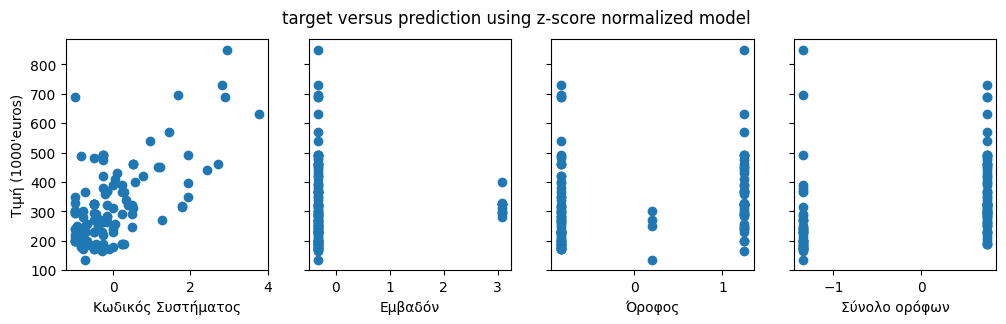

,Εμβαδόν,Όροφος Ρετιρέ,Κατάσταση,Ασανσέρ από 3ο
0,0.479710,-0.325222,1.247554,-1.343457
1,-0.782906,-0.325222,-0.831703,-1.343457
2,0.576834,3.074824,-0.831703,0.744348
3,-0.151598,-0.325222,1.247554,0.744348
4,-0.734344,-0.325222,-0.831703,0.744348


In [12]:
features_sel = features[['Εμβαδόν', 'Όροφος Ρετιρέ', 'Κατάσταση', 'Ασανσέρ από 3ο']]
plots.gen(list(features), features_sel.to_numpy(), labels, None, None, None, plot_path, True)

features_sel.head()